In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [127]:
using Revise
includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_simulate.jl") 



In [60]:
using StatsBase, Distributions, Plots

In [139]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]
X = [.12, .06]

er = expected_regimes(states_zero,transition_matrix, 5)


5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [141]:
smoother(er, transition_matrix)

5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [142]:
test_regimes = simulate_regimes(states_zero, transition_matrix, 500, 1)
test_returns = simulate_msvar_returns(test_regimes, [Β1, Β2], [Σ1, Σ2], X, 500, 1)[:,:,1]'

500×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.174267   0.0653592
 0.184862   0.0623679
 0.286471   0.111988
 0.0573793  0.0682242
 0.166482   0.0869182
 0.171671   0.081962
 0.119489   0.120951
 0.0123433  0.117233
 0.117086   0.117975
 0.232209   0.12651
 ⋮          
 0.207014   0.16056
 0.232301   0.10582
 0.148383   0.0825135
 0.210649   0.0975802
 0.145467   0.12304
 0.126613   0.105416
 0.321435   0.0994291
 0.267462   0.145002
 0.153916   0.111181

In [143]:
Y = collect(test_returns)
T = 500
p = 1
X = hcat(ones(T-1), Y[p:end-1,:])

initial_states = [(transition_matrix[2,1]/(transition_matrix[2,1]+ transition_matrix[1,2])), transition_matrix[1,2]/(transition_matrix[2,1]+ transition_matrix[1,2])]

est_regimes = hamilton_filter(Y[2:end,:], X, [Β1, Β2], [Σ1, Σ2], transition_matrix, initial_states)
smoothed_regimes = smoother(est_regimes, transition_matrix)


499×2 Matrix{Float64}:
 0.947464  0.052536
 0.938461  0.0615389
 0.963707  0.0362933
 0.970754  0.0292462
 0.968788  0.0312118
 0.894351  0.105649
 0.824417  0.175583
 0.918628  0.0813716
 0.950756  0.049244
 0.961233  0.0387671
 ⋮         
 0.932103  0.0678965
 0.986024  0.0139762
 0.98955   0.0104504
 0.97944   0.02056
 0.966759  0.0332412
 0.967045  0.0329548
 0.926299  0.0737007
 0.949129  0.0508714
 0.95782   0.0421795

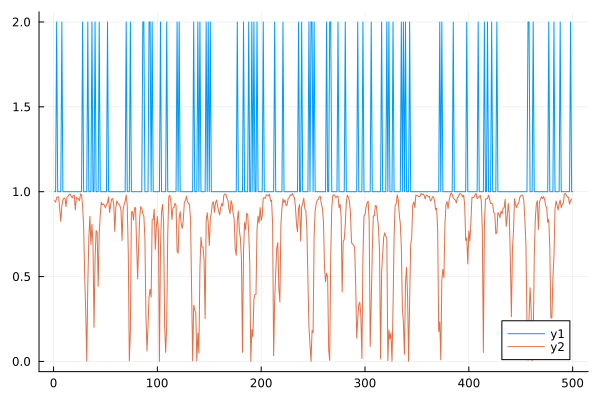

In [144]:
plot(test_regimes[:,1])
plot!(smoothed_regimes[:,1])


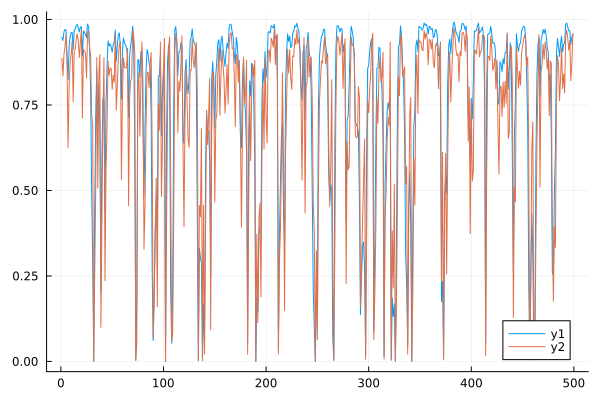

In [149]:
plot(smoothed_regimes[:,1])
plot!(est_regimes[:,1])

In [147]:
round.(sum(smoothed_regimes, dims=2), digits=4)

499×1 Matrix{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [99]:
smoothed_regimes[end,:]

2-element Vector{Float64}:
 0.4179974827533813
 0.5820025172466187

In [104]:
transition_matrix * smoothed_regimes[end-1,:]

2-element Vector{Float64}:
 0.8666387236674473
 0.22896493597720516

In [113]:
ST = est_regimes[end,:]
Stm1 = est_regimes[end-1,:]
Stm2 = est_regimes[end-2,:]


1.0

In [126]:
transition_matrix = [.9 .1;.2 .8]

states_zero = [.67, .33]

r = transition_matrix * states_zero

sum(r)

1.0340000000000003

In [132]:

r = (transition_matrix * (ST ./ next_regime(Stm1, transition_matrix))) .* Stm1
display(r)
sum(r)

2-element Vector{Float64}:
 0.8673780853203387
 0.13262191467966128

1.0

#TODO 
- sas

In [117]:

#TODO 
#- naprawić smoother
#-zrobić własne obliczenia predict dla h+2 : Xt st1 * b1 * proba st1 * transition_matrix + xt st2 * b1 * prob st2 * transition matrix
#reorganizować kod i testy, wdrożyć jakieś normalne środowisko

UndefVarError: UndefVarError: `naprawić` not defined in `Main`
Suggestion: check for spelling errors or missing imports.